# Assignment 3 specification

The purpose of this assignment is to analyse the factors that might lead to (increased) consumption of both legal and illegal drugs. The data set is hosted on the UCI repository of datasets for machine learning.

The dataset is provided with this notebook as a zip file.

For your conveninece, code is provide below to read the data into the dataframe, and this notebook is setup so that students ar prompted to complete the tasks.


Students are asked to

1. Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction. __[20 marks]__
2. For a decision tree classifier and any other classifier of your choosing, use the data description provided [here](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use. __[20 marks]__
   - When comparing between the classifiers, students should consider a wide range of classification metrics, not just one.
3. Use the same procedure as Task 2 to predict the following targets: caffeine, cocaine and heroin. Which "drug" (addictive substance) is the easiest to predict accurately, and why? __[25 marks]__
   - When comparing across the targets, students should consider a wide range of classification metrics, not just one.
4. Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study. __[35 marks]__

# Here is some code to help you get started.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik as phik
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport #https://pypi.org/project/pandas-profiling/
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import ipywidgets as widgets


%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import figure

sns.set_theme(palette="pastel")
sns.set_style('darkgrid')

In [1]:
#factors = ['neuroticism', 'extroversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsivity', 'sensation', 'education', 'age', 'gender', 'country', 'ethnicity']
#targets = ['alcohol', 'amphetamines', 'amyl_nitrate', 'benzodiazepine', 'cannabis', 'chocolate', 'cocaine', 'caffeine', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legal_highs', 'LSD', 'methadone', 'mushrooms', 'nicotine', 'semeron', 'volatile']
#colnames = factors
#colnames.extend(targets)

# Task 1: Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction.

##Start of Answer 1##

In [9]:
drugDF = pd.read_csv('data/Drug_Consumption.csv', index_col=0)
drugDF = drugDF.reset_index(drop=True)
drugDF = drugDF.rename(columns={'Nscore':'Neuroticism','Escore':'Extraversion','Oscore':'Openness','Ascore':'Agreeableness','Cscore':'Conscientiousness','SS':'Sensation','Legalh':'Legal_High','Choc':'Chocolate'})
drugDF[['Age','Gender','Education','Country','Ethnicity','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Coke','Crack','Ecstasy','Heroin','Ketamine','Legal_High','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']] = drugDF[['Age','Gender','Education','Country','Ethnicity','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Coke','Crack','Ecstasy','Heroin','Ketamine','Legal_High','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']].apply(lambda x: x.astype('category'))

targets = drugDF[['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Coke','Crack','Ecstasy','Heroin','Ketamine','Legal_High','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']]
features = drugDF.drop(columns={'Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Chocolate','Coke','Crack','Ecstasy','Heroin','Ketamine','Legal_High','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'})

print(f'Features:\n=========================================================\n{features.head(5)}')
print(f'\n\nTargets:\n=========================================================\n{targets.head(5)}')

Features:
     Age Gender                          Education Country Ethnicity  \
0  25-34      M                   Doctorate degree      UK     White   
1  35-44      M  Professional certificate/ diploma      UK     White   
2  18-24      F                     Masters degree      UK     White   
3  35-44      F                   Doctorate degree      UK     White   
4    65+      F            Left school at 18 years  Canada     White   

   Neuroticism  Extraversion  Openness  Agreeableness  Conscientiousness  \
0     -0.67825       1.93886   1.43533        0.76096           -0.14277   
1     -0.46725       0.80523  -0.84732       -1.62090           -1.01450   
2     -0.14882      -0.80615  -0.01928        0.59042            0.58489   
3      0.73545      -1.63340  -0.45174       -0.30172            1.30612   
4     -0.67825      -0.30033  -1.55521        2.03972            1.63088   

   Impulsive  Sensation  
0   -0.71126   -0.21575  
1   -1.37983    0.40148  
2   -1.37983   -1.1808

In the above cell I'm doing the following:
- Reading in the data and removing the index
- Renaming columns to be more human legible and have a more accurate name.
- Creating dataframes for both features and columns
- Checking if those dataframes are accurate

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=176)
print(f'\n\nX Training data: \n{X_train.shape, X_test.shape}\n\ny Training Data: \n {y_train.shape, y_test.shape}\n\n')



X Training data: 
((1507, 12), (377, 12))

y Training Data: 
 ((1507, 19), (377, 19))




In [10]:
print(f'{X_train.info()} {X_test.info()} {y_train.info()} {y_test.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 1507 entries, 1567 to 832
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                1507 non-null   category
 1   Gender             1507 non-null   category
 2   Education          1507 non-null   category
 3   Country            1507 non-null   category
 4   Ethnicity          1507 non-null   category
 5   Neuroticism        1507 non-null   float64 
 6   Extraversion       1507 non-null   float64 
 7   Openness           1507 non-null   float64 
 8   Agreeableness      1507 non-null   float64 
 9   Conscientiousness  1507 non-null   float64 
 10  Impulsive          1507 non-null   float64 
 11  Sensation          1507 non-null   float64 
dtypes: category(5), float64(7)
memory usage: 135.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 1863 to 1088
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
--

In the above cell I'm creating a training and test split and checking the shape of thew split to see if the split was done correctly, which it was.

In [4]:
trainingDF = X_train.join(y_train) #https://www.kdnuggets.com/2023/03/3-ways-merge-pandas-dataframes.html
trainingDF, validation = train_test_split(trainingDF, test_size=0.1)
profile = ProfileReport(trainingDF, title="Pandas Profiling Report - Training data")
trainingDF.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In the above cell, I'm creating a profile report using the training data and doing another split training data and validation data.

In [5]:
def createHeatmap(correlation):
    plt.figure(figsize=(17,17))
    heatmap = sns.heatmap(correlation, annot=True, square=True, fmt=".2f",linewidths=0.1, linecolor='white', vmin=1, vmax=-1)


The above cell is used to create functions which help to reduce reoccuring code.
- createHeatmap function creates a heatmap of size 17x17 to allow figures to be displayed properly and to be legible.

interval columns not set, guessing: ['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsive', 'Sensation']


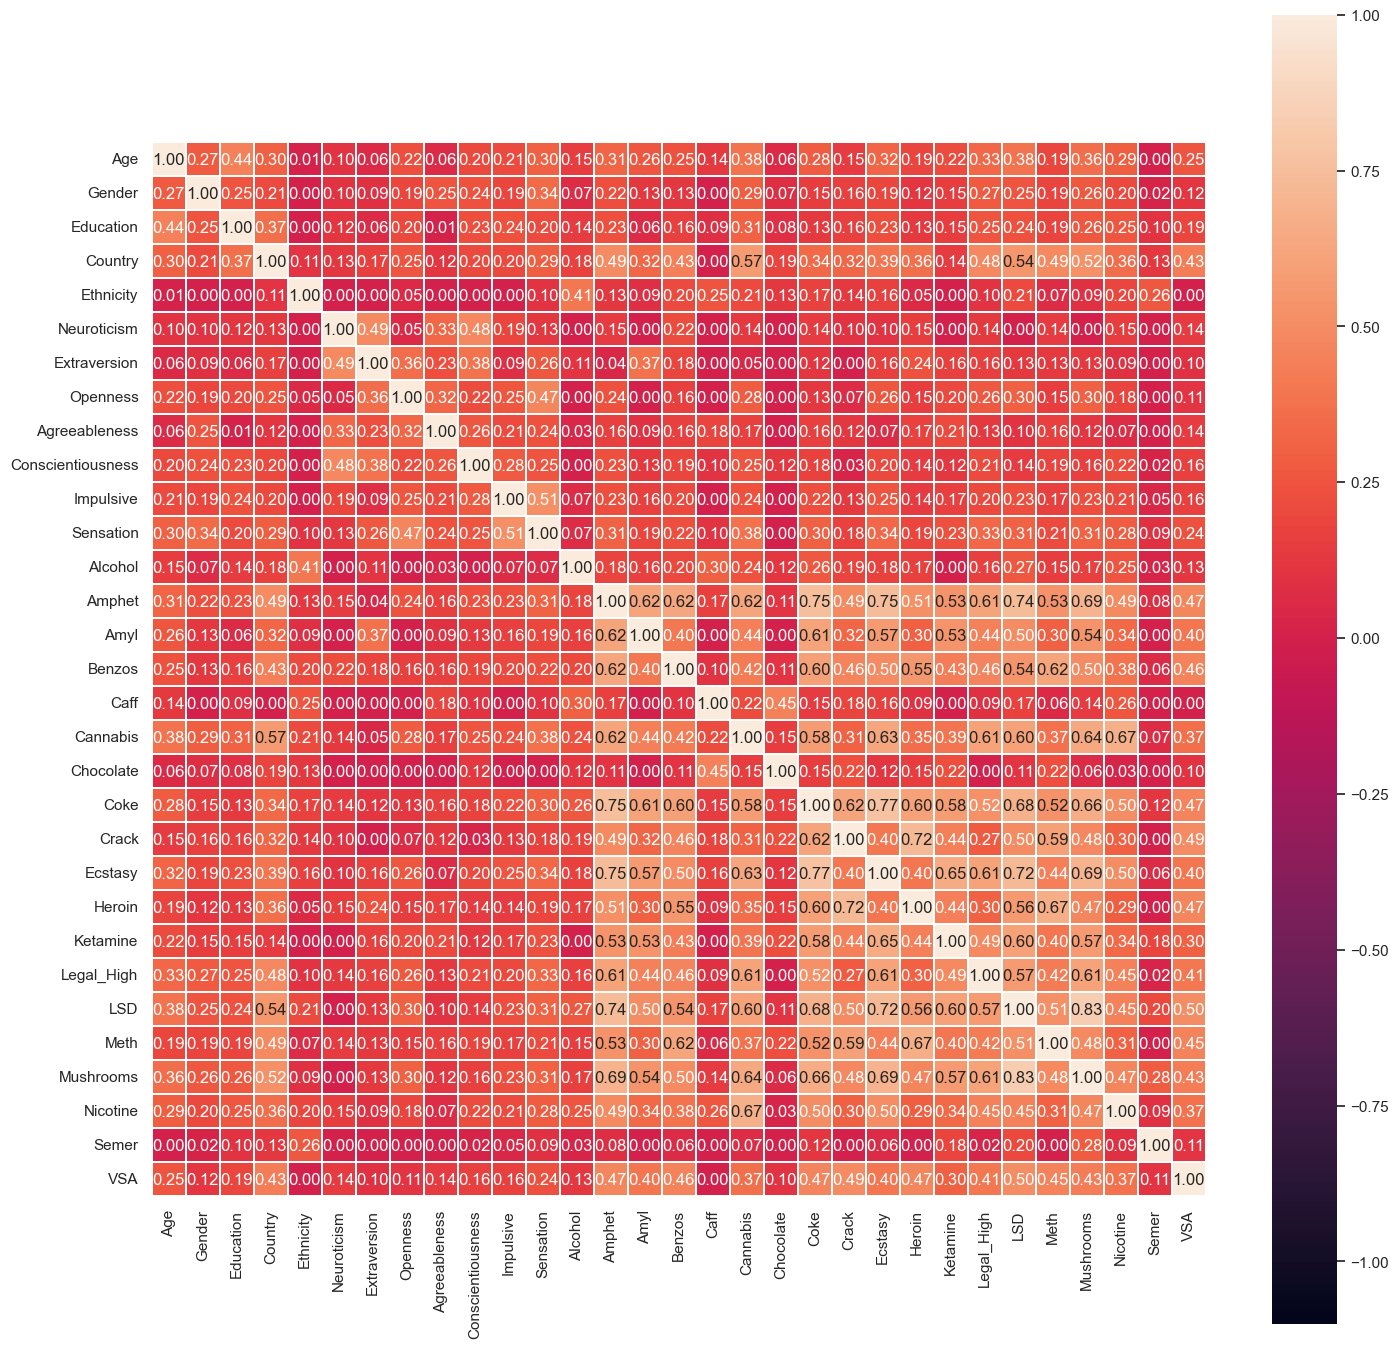

In [6]:
createHeatmap(trainingDF.phik_matrix())


In the above cell I'm creating a heatmap using a function I created. I'm using a PhiK matrix to create the heatmap seeing as some of the columns are categorical and PhiK is one of the only correlation matrices that support categorical data types.</br></br>
For the sake of brevity, I will be be ignoring any correlations that are below a value of 0.45. I will also be using the values as a metric to see if a feature is worthwhile to include in my later tasks. I'll be going through each feature/target and providing some comments on it, starting with features:
- Age does not have any significant correlation scores with any other feature or target.
- Gender does not have any significant correlation scores with any other feature or target.
- Education does not have any significant correlation scores with any other feature or target.
- Country has a significant correlation score with Amphetamines, Benzos, Cannabis, Legal Highs, LSD, Meth and Mushrooms.
- Ethnicity does not have any significant correlation scores with any other feature or target.
- Neuroticism has a significant correlation score with Extraversion and Conscientiousness.
- Extraversion has a significant correlation score with Neuroticism.
- Openness has a significant correlation score with Sensation.
- Agreeablesness does not have any significant correlation scores with any other feature or target.
- Conscientiousness has a significant correlation score with Neuroticism.
- Implusive(ness) has a significant correlation score with Senesation.
- Sensation has a significant correlation score with Impulsive(ness) and Openness.
</br></br>
Targets:
- Alcohol does not have any significant correlation scores with any other feature or target.
- Amphetamineshas has significant correlation scores with Country, Amyls, Benzos, Cannabis, Coke, Crack, Ecstasy, Heroin, Ketamine, Legal Highs, LSD, Meth, Mushrooms, Nicotine, VSA
- Amyls has significant correlation scores with Amphetamines, Coke, Ecstasy, Ketamine, LSD, Mushrooms, VSA
- Benzos has significant correlation scores with Country, Amphetamines, Coke, Crack, Ecstasy, Heroin, Legal Highs, LSD, Meth, Mushrooms, VSA
- Caff has a significant correlation score with Chocolate.
- Cannabis has significant correlation scores with Country, Amphetamines, Coke, Ecstasy, Legal Highs, LSD, Mushrooms, Nicotine
- Chocolate has a significant correlation score with Caff
- Coke has significant correlation scores with Amphetamines, Amyls, Benzos, Cannabis, Crack, Ecstasy, Heroin, Ketamine, Legal Highs, LSD, Meth, Mushrooms, Nicotine, VSA
- Crack has significant correlation scores with Amphetamines, Benzos, Coke, Crack, Heroin, Ketamine, LSD, Meth, Mushrooms, VSA
- Ecstacy has significant correlation scores with Amphetamines, Amyls, Benzos, Cannabis, Coke, Ecstasy, Ketamine, Legal Highs, LSD, Meth, Mushrooms, Nicotine
- Heroin has significant correlation scores with Amphetamines, Benzos, Coke, Crack, Ketamine, Legal Highs, LSD, Meth, Mushrooms, VSA
- Ketamine has significant correlation scores with Amphetamines, Amyls, Coke, Crack, Ecstasy, Heroin, Ketamine, Legal Highs, LSD, Mushrooms
- Legal Highs has significant correlation scores with Country, Amphetamines, Benzos, Cannabis, Coke, Ecstasy, Ketamine, LSD, Mushrooms
- LSD has significant correlation scores with Country, Amphetamines, Amyls, Benzos, Cannabis, Coke, Crack, Ecstasy, Heroin, Ketamine, Legal Highs, LSD, Meth, Mushrooms, VSA
- Meth has significant correlation scores with Country, Amphetamines, Benzos, Coke, Crack, Heroin, LSD, Mushrooms, VSA
- Mushrooms has significant correlation scores with Country, Amphetamines, Amyls, Benzos, Cannabis, Coke, Crack, Ecstasy, Heroin, Ketamine, Legal Highs, LSD, Meth, Nicotine
- Nicotine has significant correlation scores with Amphetamines, Cannabis, Coke, Ecstasy, Mushrooms
- Semer does not have any significant correlation scores with any other feature or target.
- VSA has significant correlation scores with Amphetamines, Amyls, Benzos, Coke, Crack, Heroin, LSD, Meth
</br></br>
From what I can tell from the heatmap I can see that a lot of the drugs have a correlation with other drugs but it also seems that certain drugs are correlated with country.

In [35]:
cat_col = [col for col in trainingDF if trainingDF[col].dtype == 'category']
num_col = [col for col in trainingDF if trainingDF[col].dtype != 'category']
cat_feature_col = [col for col in X_train if X_train[col].dtype == 'category']
cat_feature_num = [col for col in X_train if X_train[col].dtype != 'category']
target_col = [col for col in y_train if y_train[col].dtype]

dropdownCat= widgets.Dropdown(options=cat_col, value=cat_col[0], description="Category")
dropdownNum = widgets.Dropdown(options=num_col, value=num_col[0], description="Numerical")

dropdownCatFeatures= widgets.Dropdown(options=cat_feature_col, value=cat_feature_col[0], description="Category")
dropdownNumFeatures = widgets.Dropdown(options=cat_feature_num, value=cat_feature_num[0], description="Numerical")
dropdownTarget = widgets.Dropdown(options=target_col, value=target_col[0], description="Targets")

orientation = ["h", "v"]
dropdownOrientation = widgets.Dropdown(options=orientation, value=orientation[0], description="Orientation")

uiControlsNum = widgets.HBox([dropdownNum])
uiControlsCat = widgets.HBox([dropdownCat])
uiControlsNumFeatures = widgets.HBox([dropdownNumFeatures, dropdownTarget])
uiControlsCatFeatures = widgets.HBox([dropdownCatFeatures, dropdownTarget])
# uiControlsTargets = widgets.HBox([dropdownTarget])

def doHistPlotNum(column):
    histPlotNum=sns.histplot(data=trainingDF, x=column, bins=40, color='red')

def doHistplotCat(column):
    histplotcat=sns.histplot(data=trainingDF, x=column, color='green')

def doLMplot(columnX, columnY):
    lmplot=sns.lmplot(data=trainingDF, x=columnX, y=columnY, line_kws={'color': 'gray'})

def doCatPlot(columnX, columnY):
    catplot=sns.catplot(data=trainingDF, x=columnX, y=columnY, orient='h', kind='bar')


In [14]:
out = widgets.interactive_output(doHistPlotNum, {"column":dropdownNum})
display(uiControlsNum, out)

Output()

In [15]:
out = widgets.interactive_output(doHistplotCat, {"column":dropdownCat})
display(uiControlsCat, out)

Output()

In [ ]:
out = widgets.interactive_output(doCatPlot, {"columnX":dropdownNumFeatures, "columnY":dropdownTarget})
display(uiControlsNumFeatures, out)

Due to a sheer number of columns present in the dataset, I see it as impractical and a huge time sink to go through each combination of targets - features and features - features and create plots for them. Though I have included some plots which include the numerical and categorical features and the the numerical features and targets. Since I have already created heatmap with correlations, I will be using that more than the plots.

In [ ]:
trainingDF.info()

##End of Answer 1##

# Task 2: For a decision tree classifier and any other classifier of your choosing, use the data description provided [here](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use.

##Start of Answer 2##

In [54]:
# Age

ageDummiesDF = pd.get_dummies(X_train['Age'],\
                               prefix='Age',\
                                dtype=int)\
                                .rename(columns={\
                                "Age_18-24": "18-24",\
                                "Age_25-34": "25-34",
                                "Age_35-44": "35-44",
                                "Age_45-54": "45-54",
                                "Age_55-64": "55-64",
                                "Age_65+": "65+"})

ageDummiesDFTest = pd.get_dummies(X_test['Age'],\
                               prefix='Age',\
                                dtype=int)\
                                .rename(columns={\
                                "Age_18-24": "18-24",\
                                "Age_25-34": "25-34",
                                "Age_35-44": "35-44",
                                "Age_45-54": "45-54",
                                "Age_55-64": "55-64",
                                "Age_65+": "65+"})

# Gender
genderDummiesDF = pd.get_dummies(X_train['Gender'],\
                               prefix='Gender',\
                                dtype=int)\
                                .rename(columns={\
                                "Gender_M": "Male",\
                                "Gender_F": "Female"})

genderDummiesDFTest = pd.get_dummies(X_test['Gender'],\
                               prefix='Gender',\
                                dtype=int)\
                                .rename(columns={\
                                "Gender_M": "Male",\
                                "Gender_F": "Female"})

# Education
educationDummiesDF = pd.get_dummies(X_train['Education'],\
                               prefix='Ed',\
                                dtype=int)\
                                .rename(columns={\
                                "Ed_Left school before 16 years": "Left school before 16",\
                                "Ed_Left school at 16 years": "Left school at 16",
                                "Ed_Left school at 17 years": "Left school at 17",
                                "Ed_Left school at 18 years": "Left school at 18",
                                "Ed_Some college or university, no certificate or degree": "Some college or university",
                                "Ed_Professional certificate/ diploma": "Professional certificate/ diploma",
                                "Ed_University degree": "University degree",
                                "Ed_Masters degree": "Masters degree",
                                "Ed_Doctorate degree": "Doctorate degree"})

educationDummiesDFTest = pd.get_dummies(X_test['Education'],\
                               prefix='Ed',\
                                dtype=int)\
                                .rename(columns={\
                                "Ed_Left school before 16 years": "Left school before 16",\
                                "Ed_Left school at 16 years": "Left school at 16",
                                "Ed_Left school at 17 years": "Left school at 17",
                                "Ed_Left school at 18 years": "Left school at 18",
                                "Ed_Some college or university, no certificate or degree": "Some college or university",
                                "Ed_Professional certificate/ diploma": "Professional certificate/ diploma",
                                "Ed_University degree": "University degree",
                                "Ed_Masters degree": "Masters degree",
                                "Ed_Doctorate degree": "Doctorate degree"})

# Country
countryDummiesDF = pd.get_dummies(X_train['Country'],\
                               prefix='Country',\
                                dtype=int)\
                                .rename(columns={\
                                "Country_Australia": "AU",\
                                "Country_Canada": "CA",
                                "Country_New Zealand": "NZ",
                                "Country_Other": "Other",
                                "Country_Republic of Ireland": "ROI",
                                "Country_UK": "UK",
                                "Country_USA": "USA"})

countryDummiesDFTest = pd.get_dummies(X_test['Country'],\
                               prefix='Country',\
                                dtype=int)\
                                .rename(columns={\
                                "Country_Australia": "AU",\
                                "Country_Canada": "CA",
                                "Country_New Zealand": "NZ",
                                "Country_Other": "Other",
                                "Country_Republic of Ireland": "ROI",
                                "Country_UK": "UK",
                                "Country_USA": "USA"})

# Ethnicity

ethnicityDummiesDF = pd.get_dummies(X_train['Ethnicity'],\
                               prefix='Eth',\
                                dtype=int)\
                                .rename(columns={\
                                "Eth_Asian": "Asian",\
                                "Eth_Black": "Black",
                                "Eth_Mixed-Black/Asian": "Mixed-Black/Asian",
                                "Eth_Mixed-White/Asian": "Mixed-White/Asian",
                                "Eth_Mixed-White/Black": "Mixed-White/Black",
                                "Eth_Other": "Other",
                                "Eth_White": "White"})

ethnicityDummiesDFTest = pd.get_dummies(X_test['Ethnicity'],\
                               prefix='Eth',\
                                dtype=int)\
                                .rename(columns={\
                                "Eth_Asian": "Asian",\
                                "Eth_Black": "Black",
                                "Eth_Mixed-Black/Asian": "Mixed-Black/Asian",
                                "Eth_Mixed-White/Asian": "Mixed-White/Asian",
                                "Eth_Mixed-White/Black": "Mixed-White/Black",
                                "Eth_Other": "Other",
                                "Eth_White": "White"})


<class 'pandas.core.frame.DataFrame'>
Index: 1507 entries, 1567 to 832
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Asian              1507 non-null   int32
 1   Black              1507 non-null   int32
 2   Mixed-Black/Asian  1507 non-null   int32
 3   Mixed-White/Asian  1507 non-null   int32
 4   Mixed-White/Black  1507 non-null   int32
 5   Other              1507 non-null   int32
 6   White              1507 non-null   int32
dtypes: int32(7)
memory usage: 85.3 KB


### TODO
Convert all targets to dummies

In order to go through with decision tree classifier, I need the non-numerical columns to be converted to numerical and the best way to do that is by using get_dummies to convert categories to booleans. This the first step I do in the the above cell.

In [ ]:
# X_train = X_train.apply(lambda x: x.astype('float64'))
# X_test = X_test.apply(lambda x: x.astype('float64'))
# y_train = y_train.apply(lambda x: x.astype('float64'))
# y_test = y_test.apply(lambda x: x.astype('float64'))

# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# accuracy_score = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy_score}')

##End of Answer 2##

# Task 3: Use the same procedure as Task 2 to predict the following targets: caffeine, cocaine and heroin. Which "drug" (addictive substance) is the easiest to predict accurately, and why?

##Start of Answer 3##

##End of Answer 3##

# Task 4: Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study.

##Start of Answer 4##

##End of Answer 4##